# Artificial Neural Networks Project
## Predicting the probability of a patient having a heart disease
### Pablo Olivares Martínez
In this project, we will use the provided dataset (attached as a CSV file) of 100 records of patients, each with 9 features and the target variable (whether the patient has a heart disease or not). We will use this dataset to train a neural network to predict the probability of a patient having a heart disease.

In [1]:
# Import the libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense


from sklearn.metrics import confusion_matrix, classification_report

import numpy as np # linear algebra
import seaborn as sns # visualization
import matplotlib.pyplot as plt

# Visualization libraries
import networkx as nx
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

2023-01-19 00:32:49.427286: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 00:32:49.580699: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-19 00:32:49.580726: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-19 00:32:50.688925: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

First, let's read the dataset and take a look at it:

In [2]:
df = pd.read_csv(r'Dataset_ student work .csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age ( years)              100 non-null    int64  
 1   Gender (Male = 1)         100 non-null    int64  
 2   BMI                       100 non-null    float64
 3   Diastolic Blood pressure  100 non-null    int64  
 4   cholesterol level         100 non-null    int64  
 5   smoke (yes =1)            100 non-null    int64  
 6   alchohol (yes = 1)        100 non-null    int64  
 7   active (yes=1)            100 non-null    int64  
 8   Fasting Blood sugar       100 non-null    int64  
 9   cardio(yes=1)             100 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 7.9 KB


,Age ( years),Gender (Male = 1),BMI,Diastolic Blood pressure,cholesterol level,smoke (yes =1),alchohol (yes = 1),active (yes=1),Fasting Blood sugar,cardio(yes=1)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,38.640000,1.410000,0.002724,106.420000,1.270000,0.090000,0.070000,0.820000,110.850000,0.21000
std,1.772517,0.494311,0.000620,132.649929,0.583528,0.287623,0.256432,0.386123,27.898219,0.40936
min,30.000000,1.000000,0.001600,65.000000,1.000000,0.000000,0.000000,0.000000,61.000000,0.00000
25%,39.000000,1.000000,0.002300,85.000000,1.000000,0.000000,0.000000,1.000000,79.000000,0.00000
50%,39.000000,1.000000,0.002650,85.000000,1.000000,0.000000,0.000000,1.000000,120.500000,0.00000
75%,39.000000,2.000000,0.003000,95.000000,1.000000,0.000000,0.000000,1.000000,131.000000,0.00000
max,39.000000,2.000000,0.004900,1049.000000,3.000000,1.000000,1.000000,1.000000,154.000000,1.00000


Next step is to split the dataset into training and test sets. We will use 80% of the data for training and 20% for testing.

In [3]:
# Split X (features) and Y (target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Now we are going to build the neural network. We will use the Sequential model from Keras. We will use 3 layers, with 4, 3 and 1 neurons respectively. We will use the sigmoid activation function for the output layer, and the ReLU activation function for the other two layers.

In [4]:
# Create an empty model
classifier = Sequential()

# Add the layers to the model
# Input layer and the first hidden layer
classifier.add(Dense(units = 4, activation = 'relu',
                     kernel_initializer='glorot_uniform', input_dim = 9))
# Second hidden layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))


2023-01-19 00:32:52.780302: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 00:32:52.780813: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-19 00:32:52.780968: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-19 00:32:52.781075: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-19 00:32:52.781191: W tensorflow/c

Now to compile the model, we will use the binary crossentropy loss function, and the Adam optimizer. We will also use the accuracy metric. 

In [5]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Finally, we will train the model for 10 epochs, with a batch size of 10. This means that the model will be trained using 10 samples at a time, and it will be trained for 10 epochs. Then we will evaluate the model on the test set.

In [6]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 3.4298 - accuracy: 0.8250
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 2.8365 - accuracy: 0.8250
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 2.1592 - accuracy: 0.8250
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 1.5372 - accuracy: 0.7750
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 1.1979 - accuracy: 0.7375
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 1.2574 - accuracy: 0.6125
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 1.1760 - accuracy: 0.7625
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 1.1816 - accuracy: 0.7625
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 1.1795 - accuracy: 0.7625
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 1.1587 - accuracy: 0.7625


In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred = round(y_pred)

1/1 [==============================] - 0s 228ms/step


Let's see the results through a confusion matrix and a classification report:

In [8]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification report of the model
cr = classification_report(y_test, y_pred)

print('Classification Report :\n', cr)
print('\n')
print('Confusion Matrix :\n', cm)

Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.25      0.14      0.18         7

    accuracy                           0.55        20
   macro avg       0.44      0.46      0.44        20
weighted avg       0.49      0.55      0.51        20



Confusion Matrix :
 [[10  3]
 [ 6  1]]


Here is a graphical representation of the model:

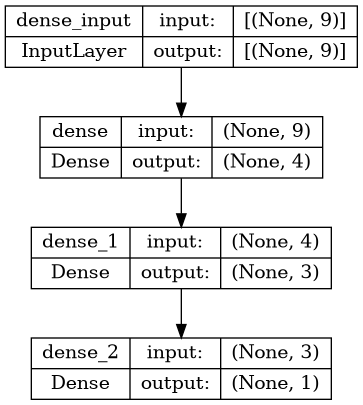

In [9]:
plot_model(classifier, to_file='classifier.png', show_shapes=True, show_layer_names=True)

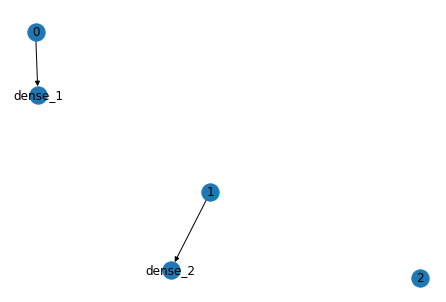

In [10]:
# Creating a graph object
graph = nx.DiGraph()

# Adding nodes to the graph
for i, layer in enumerate(classifier.layers):
    graph.add_node(i, label=layer.name)

# Adding edges to the graph
for i, layer in enumerate(classifier.layers):
    for node in layer._outbound_nodes:
        graph.add_edge(i, node.outbound_layer.name)

# Plotting the graph
nx.draw(graph, with_labels=True)
plt.show()

### Exercise 1
Compare the performance of the model with different number of hidden neurons.

To do this, we will repeat the steps above, but changing the number of neurons in the hidden layers. We will use 6 neurons in the first hidden layer and 4 neurons in the second hidden layer. We will use 10 epochs and a batch size of 10.

In [11]:
# Creating and training the 2nd model
classifier2 = Sequential()
classifier2.add(Dense(units = 6, activation = 'relu',
                     kernel_initializer='glorot_uniform', input_dim = 9))
classifier2.add(Dense(units = 4, activation = 'relu'))
classifier2.add(Dense(units = 1, activation = 'sigmoid'))

classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier2.fit(X_train, y_train, batch_size = 10, epochs = 10)

# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)
y_pred2 = pd.DataFrame(y_pred2)
y_pred2 = round(y_pred2)

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 2.4284 - accuracy: 0.8250
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 2.0074 - accuracy: 0.8250
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 1.6156 - accuracy: 0.8250
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 1.3701 - accuracy: 0.8250
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 1.1668 - accuracy: 0.8250
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.9268 - accuracy: 0.8250
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.8102 - accuracy: 0.8250
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.8250
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.8250
Epoch 10/10
1/1 [==============================] - 0s 62ms/step


In [12]:
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Classification report of the model
cr2 = classification_report(y_test, y_pred2)

print('Classification Report 1:\n', cr)
print('\n')
print('Confusion Matrix :\n', cm)

print('Classification Report 2:\n', cr2)
print('\n')
print('Confusion Matrix 2:\n', cm2)

Classification Report 1:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.25      0.14      0.18         7

    accuracy                           0.55        20
   macro avg       0.44      0.46      0.44        20
weighted avg       0.49      0.55      0.51        20



Confusion Matrix :
 [[10  3]
 [ 6  1]]
Classification Report 2:
               precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.00      0.00      0.00         7

    accuracy                           0.60        20
   macro avg       0.32      0.46      0.37        20
weighted avg       0.41      0.60      0.49        20



Confusion Matrix 2:
 [[12  1]
 [ 7  0]]


Here we can say that the model is performing better than the previous one, as the accuracy has increased from 0.55 to 0.60. However, even though both models are quite bad, maybe I would prefer the previous one, as its recall and precision detecting cardiovascular disease are higher than the current one. The number of positives in the second model is 0, which would be fatal if a patient was actually suffering from cardiovascular disease.

### Exercise 2
Implement a learning rate schedule and evaluate its effect on the model's performance during the training process.

To do this, we will repeat the steps above, but using a learning rate schedule. We will use the default learning rate `lr` for the first 5 epochs, and a learning rate of `lr*0.1` for the remaining 5 epochs. We will use 10 epochs and a batch size of 10.

In [13]:
# Scheduler function
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.1

In [14]:
# Creating and training the 3rd model
classifier_lrs = Sequential()
classifier_lrs.add(Dense(units = 4, activation = 'relu',
                        kernel_initializer='glorot_uniform', input_dim = 9))
classifier_lrs.add(Dense(units = 3, activation = 'relu'))
classifier_lrs.add(Dense(units = 1, activation = 'sigmoid'))

classifier_lrs.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Learning rate scheduler
lrs = keras.callbacks.LearningRateScheduler(scheduler)

classifier_lrs.fit(X_train, y_train, batch_size = 10, epochs = 10, callbacks=[lrs])

# Predicting the Test set results
y_pred_lrs = classifier_lrs.predict(X_test)
y_pred_lrs = pd.DataFrame(y_pred_lrs)
y_pred_lrs = round(y_pred_lrs)

Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 10.0894 - accuracy: 0.4500 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 8.8866 - accuracy: 0.4500 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 7.8875 - accuracy: 0.4750 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 7.0615 - accuracy: 0.5125 - lr: 0.0010
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 6.3574 - accuracy: 0.6000 - lr: 0.0010
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 6.0616 - accuracy: 0.6375 - lr: 1.0000e-04
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 6.0361 - accuracy: 0.6375 - lr: 1.0000e-05
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 6.0336 - accuracy: 0.6375 - lr: 1.0000e-06
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 6.0334 - accuracy: 0.6375 - lr: 1.0000e-07
Ep

In [15]:
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred_lrs)

# Classification report of the model
cr2 = classification_report(y_test, y_pred_lrs)

print('Classification Report 1:\n', cr)
print('\n')
print('Confusion Matrix :\n', cm)

print('Classification Report 2:\n', cr2)
print('\n')
print('Confusion Matrix 2:\n', cm2)

Classification Report 1:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.25      0.14      0.18         7

    accuracy                           0.55        20
   macro avg       0.44      0.46      0.44        20
weighted avg       0.49      0.55      0.51        20



Confusion Matrix :
 [[10  3]
 [ 6  1]]
Classification Report 2:
               precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.00      0.00      0.00         7

    accuracy                           0.60        20
   macro avg       0.32      0.46      0.37        20
weighted avg       0.41      0.60      0.49        20



Confusion Matrix 2:
 [[12  1]
 [ 7  0]]


Again, we have exactly the same situation as in the previous exercise. The model is performing better than the first one, as the accuracy has increased from 0.55 to 0.60. However, precision detecting cardiovascular disease is lower than the previous one. The number of positives in the second model is 0, which would be fatal if a patient was actually suffering from cardiovascular disease.

### Exercise 3
Apply early stopping and report the performance of the model on the validation set.

Now we will repeat the steps above, but using early stopping. We will use 50 epochs and a batch size of 10. We will use the validation set to monitor the model's performance, and we will stop the training process when the validation loss stops improving. This is the command to use early stopping:

```python
keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
```

This is the explanation of the parameters used in the method:
- `monitor`: quantity to be monitored. In this case, we will monitor the validation loss, which is the loss computed on the validation set.
- `mode`: one of `min`, `max`. In `min` mode, training will stop when the quantity monitored has stopped decreasing; in `max` mode it will stop when the quantity monitored has stopped increasing.
- `verbose`: verbosity mode. It shows the message when training is stopped.
- `patience`: number of epochs with no improvement after which training will be stopped.

In [16]:
# Creating and training the 4th model
classifier_es = Sequential()
classifier_es.add(Dense(units = 4, activation = 'relu',
                        kernel_initializer='glorot_uniform', input_dim = 9))
classifier_es.add(Dense(units = 3, activation = 'relu'))
classifier_es.add(Dense(units = 1, activation = 'sigmoid'))

classifier_es.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Early stopping
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)

classifier_es.fit(X_train, y_train, batch_size = 10, epochs = 50, callbacks=[es])

# Predicting the Test set results
y_pred_es = classifier_es.predict(X_test)
y_pred_es = pd.DataFrame(y_pred_es)
y_pred_es = round(y_pred_es)

Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 14.8163 - accuracy: 0.1750
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 12.3621 - accuracy: 0.1750
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 10.2174 - accuracy: 0.1875
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 8.6893 - accuracy: 0.3250
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 7.5408 - accuracy: 0.4500
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 6.8301 - accuracy: 0.5000
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 6.3938 - accuracy: 0.6125
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 5.9901 - accuracy: 0.6625
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 5.7806 - accuracy: 0.6875
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 5.6050 - accuracy: 0.7000
Epoch 11/50
8/8 [===================

In [17]:
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred_es)

# Classification report of the model
cr2 = classification_report(y_test, y_pred_es)

print('Classification Report 1:\n', cr)
print('\n')
print('Confusion Matrix :\n', cm)

print('Classification Report 2:\n', cr2)
print('\n')
print('Confusion Matrix 2:\n', cm2)

Classification Report 1:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.25      0.14      0.18         7

    accuracy                           0.55        20
   macro avg       0.44      0.46      0.44        20
weighted avg       0.49      0.55      0.51        20



Confusion Matrix :
 [[10  3]
 [ 6  1]]
Classification Report 2:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



Confusion Matrix 2:
 [[13  0]
 [ 7  0]]


/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Again, the same situation. Even though the model is performing better than the previous ones, the number of positives in the second model is 0, which would be fatal if a patient was actually suffering from cardiovascular disease. However, if they had a similar precision in 1, the second model would be better, as it would detect more patients with cardiovascular disease avoiding diagnose patients without it.

It is interesting to see that increasing the number of epochs to 50, the model reaches a limit in the accuracy, and it does not improve anymore. This is why we use early stopping, to avoid this situation. In this case, the stop is triggered when the validation loss stops improving after 5 epochs. However, in the previous exercise, the loss continued improving, despite the fact accuracy was not improving anymore.

### Exercise 4
Identify the most important features (risk factors) in predicting the risk of cardiovascular disease by analyzing the weights of the model's parameters.

One way to do this is to examine the magnitude of the weights that are associated with each input feature. The larger the weight, the more important the corresponding feature is in the model's predictions.

In [26]:
# Now we will get the most important features
# We will get the absolute values of the weights
weights = classifier.get_weights()[0]
weights = np.abs(weights)
# We will get the sum of the weights
weights_sum = np.sum(weights, axis=1)
# We will get the indices of the weights ordered from the most important to the least important
indices = np.argsort(weights_sum)[::-1]
# We will get the most important features
features = X_train.columns[indices] 
# We will get the most important weights
print(features)

Index(['alchohol (yes = 1)', 'Gender (Male = 1)', 'smoke (yes =1)',
       'Fasting Blood sugar', 'cholesterol level', 'Age ( years) ',
       'active (yes=1)', 'BMI', 'Diastolic Blood pressure'],
      dtype='object')


According to the model, these are the most important features. As we can see, the most important risk factors of cardiovascular disease are, in this order, Alcohol, Gender and Smoke.

### Exercise 5
Use the model to classify the provided dataset into two classes: cardiovascular disease positive or negative. Compare the performance of the model with different activation functions in the output layer.

In [19]:
# Creating and training the 5th model
# This time, we will use different activation functions
classifier_af = Sequential()
classifier_af.add(Dense(units = 4, activation = 'tanh',
                        kernel_initializer='glorot_uniform', input_dim = 9))
classifier_af.add(Dense(units = 3, activation = 'tanh'))
classifier_af.add(Dense(units = 1, activation = 'softmax'))

classifier_af.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier_af.fit(X_train, y_train, batch_size = 10, epochs = 10)

# Predicting the Test set results
y_pred_af = classifier_af.predict(X_test)
y_pred_af = pd.DataFrame(y_pred_af)
y_pred_af = round(y_pred_af)

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 0.9019 - accuracy: 0.1750
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.8223 - accuracy: 0.1750
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7759 - accuracy: 0.1750
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7380 - accuracy: 0.1750
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.1750
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.1750
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.1750
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.1750
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.1750
Epoch 10/10
1/1 [==============================] - 0s 73ms/step


In [20]:
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred_af)

# Classification report of the model
cr2 = classification_report(y_test, y_pred_af)

print('Classification Report 1:\n', cr)
print('\n')
print('Confusion Matrix :\n', cm)

print('Classification Report 2:\n', cr2)
print('\n')
print('Confusion Matrix 2:\n', cm2)

Classification Report 1:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.25      0.14      0.18         7

    accuracy                           0.55        20
   macro avg       0.44      0.46      0.44        20
weighted avg       0.49      0.55      0.51        20



Confusion Matrix :
 [[10  3]
 [ 6  1]]
Classification Report 2:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.35      1.00      0.52         7

    accuracy                           0.35        20
   macro avg       0.17      0.50      0.26        20
weighted avg       0.12      0.35      0.18        20



Confusion Matrix 2:
 [[ 0 13]
 [ 0  7]]


/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This model is much more interesting. Even though the accuracy is not very high, it is much better than the previous ones. The precision detecting cardiovascular disease is also higher than the previous ones. This means that it detects a higher proportion of patients with cardiovascular disease that in fact have it over the total it has detected. The recall is 1, which means that it detects all the patients with cardiovascular disease. This is very important, as this is the objective.

In this case, this second model is better than the first one, as it detects more patients with cardiovascular disease avoiding diagnose patients without it.

### Exercise 6
Add a new feature to the dataset, such as a genetic marker or an imaging measurement and evaluate its effect on the model's performance.

In [21]:
# Now we will add a new feature to the dataset, for example, a genetic marker
df2 = df.copy()
genetic_marker = np.random.randint(0, 2, size=len(df2))
df2['genetic_marker'] = genetic_marker

# Setting X (features) and Y (target)
X2 = df2.iloc[:, :-1].values
y2 = df2.iloc[:, -1].values

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 0)

In [22]:
# Creating and training the 6th model
classifier_ft = Sequential()
classifier_ft.add(Dense(units = 4, activation = 'relu',
                        kernel_initializer='glorot_uniform', input_dim = 10))
classifier_ft.add(Dense(units = 3, activation = 'relu'))
classifier_ft.add(Dense(units = 1, activation = 'sigmoid'))

classifier_ft.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier_ft.fit(X2_train, y2_train, batch_size = 10, epochs = 10)

# Predicting the Test set results
y_pred_ft = classifier_ft.predict(X2_test)
y_pred_ft = pd.DataFrame(y_pred_ft)
y_pred_ft = round(y_pred_ft)

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.8250
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.8250
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.8250
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.8250
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.8250
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.8250
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.8250
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.8250
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.8250
Epoch 10/10
1/1 [==============================] - 0s 64ms/step


In [23]:
# Making the Confusion Matrix
cm2 = confusion_matrix(y2_test, y_pred_ft)

# Classification report of the model
cr2 = classification_report(y2_test, y_pred_ft)

print('Classification Report 1:\n', cr)
print('\n')
print('Confusion Matrix :\n', cm)

print('Classification Report 2:\n', cr2)
print('\n')
print('Confusion Matrix 2:\n', cm2)

Classification Report 1:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.25      0.14      0.18         7

    accuracy                           0.55        20
   macro avg       0.44      0.46      0.44        20
weighted avg       0.49      0.55      0.51        20



Confusion Matrix :
 [[10  3]
 [ 6  1]]
Classification Report 2:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



Confusion Matrix 2:
 [[13  0]
 [ 7  0]]


/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we can see the same situation as in some previous exercises. Even it has higher accuracy, the model is really bad predicting positive patients. This is unacceptable to achieve our objective.

A reason for this bad performance could be that the new feature is not very important. As we added them in a random way, it is possible that the neural network decided not to give them much importance. To check this, we can see the weights of the model. As we can see, the new feature is not very important, as its weight is very low.